# Exploratory Data Analysis

## Load Data

In [168]:
import numpy as np
import pandas as pd

img_1 = np.loadtxt("../../data/image_data/image1.txt")
img_2 = np.loadtxt("../../data/image_data/image2.txt")
img_3 = np.loadtxt("../../data/image_data/image3.txt")
all_imgs = np.concatenate((img_1, img_2, img_3), axis=0)

columns = ["y", "x", "label", "NDAI", "SD", "CORR", "DF Angle", "CF Angle", "BF Angle", "AF Angle", "AN Angle"]

img_1_df = pd.DataFrame(img_1, columns=columns)
img_2_df = pd.DataFrame(img_2, columns=columns)
img_3_df = pd.DataFrame(img_3, columns=columns)
all_imgs_df = pd.DataFrame(all_imgs, columns=columns)

img_1_df["label"] = img_1_df["label"].replace({-1: "No Cloud", 1: "Cloud", 0: "Unlabeled"})
img_2_df["label"] = img_2_df["label"].replace({-1: "No Cloud", 1: "Cloud", 0: "Unlabeled"})
img_3_df["label"] = img_3_df["label"].replace({-1: "No Cloud", 1: "Cloud", 0: "Unlabeled"})
all_imgs_df["label"] = all_imgs_df["label"].replace({-1: "No Cloud", 1: "Cloud", 0: "Unlabeled"})



## Label Distribution

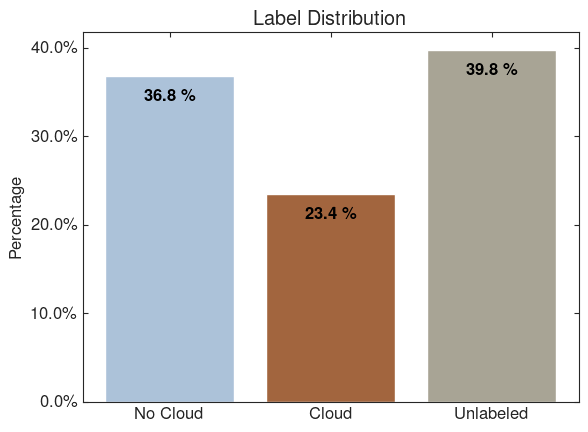

In [169]:
# Bar plot of label distribution
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns


sns.set_style("white")
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] =  "Helvetica"
plt.rcParams["font.size"] = 12
plt.rcParams["xtick.direction"] = "in" 
plt.rcParams["ytick.direction"] = "in" 
plt.rcParams["xtick.top"] = True
plt.rcParams["xtick.bottom"] = True 
plt.rcParams["ytick.right"] = True 
plt.rcParams["ytick.left"] = True

color_map = {"Cloud": "xkcd:cloudy blue", "No Cloud": "xkcd:earth", "Unlabeled": "xkcd:greyish"}


fig, ax_labels = plt.subplots()
# Prepare data
label_counts = all_imgs_df["label"].value_counts(normalize=True)
label_counts = label_counts.reindex(["No Cloud", "Cloud", "Unlabeled"])
# Create bar plot
plt.bar(label_counts.index, label_counts, color=color_map.values())
# Add percentage labels
ax_labels.bar_label(
    ax_labels.containers[0],
    labels=[r"\textbf{" + f"{p*100:.3}" + r" \%}" for p in label_counts],
    fontsize=12,
    color="black",
    weight="bold",
    label_type="edge",
    padding=-20,
)
# Plot formatting
plt.title("Label Distribution")
plt.ylabel("Percentage")
ax_labels.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1))
plt.yticks(np.arange(0, 0.5, 0.1))
plt.show()

## Labels on a map

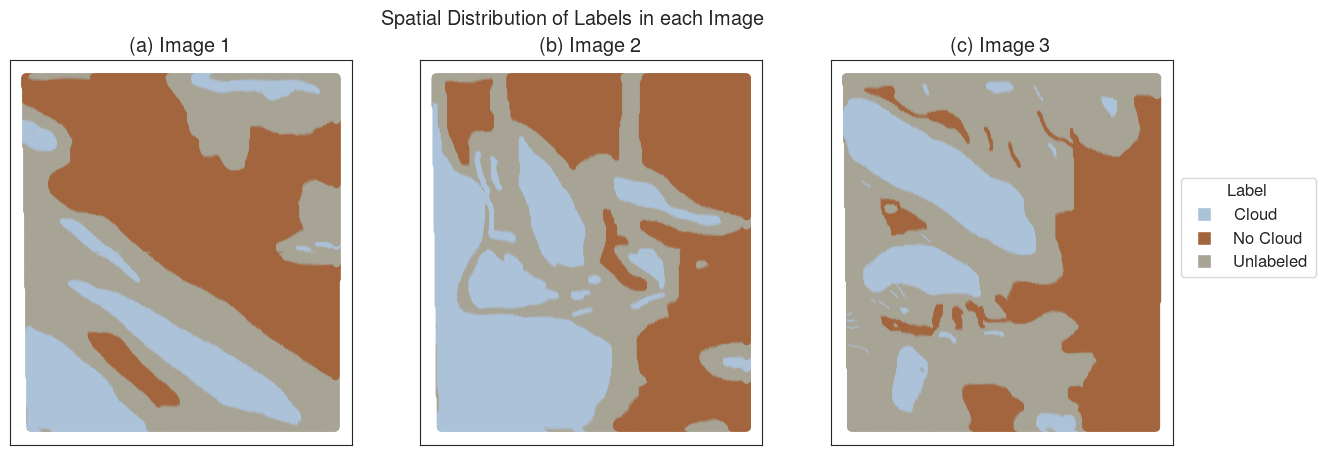

In [170]:
# Plot each of the images next to each other
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, img_df in enumerate([img_1_df, img_2_df, img_3_df]):
    sns.scatterplot(data=img_df, x="x", y="y", hue="label", palette=color_map, ax=axs[i], edgecolor="none")
    axs[i].set_title(f"({chr(97+i)}) Image {i+1}")
    # Remove axis labels
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_xlabel(None)
    axs[i].set_ylabel(None)
    # Remove legend from each subplot
    axs[i].get_legend().remove()
    
# Add global legend
handles = [plt.Line2D(
    [0], 
    [0], 
    marker="s", 
    color="w", 
    markerfacecolor=color_map[label], 
    markersize=10, 
    label=label) 
    for label in color_map.keys()]
fig.legend(handles=handles, labels=color_map.keys(), loc="center right", title="Label")
# Add global title
plt.suptitle("Spatial Distribution of Labels in each Image")
plt.show()

## Distribution of Features by Labels

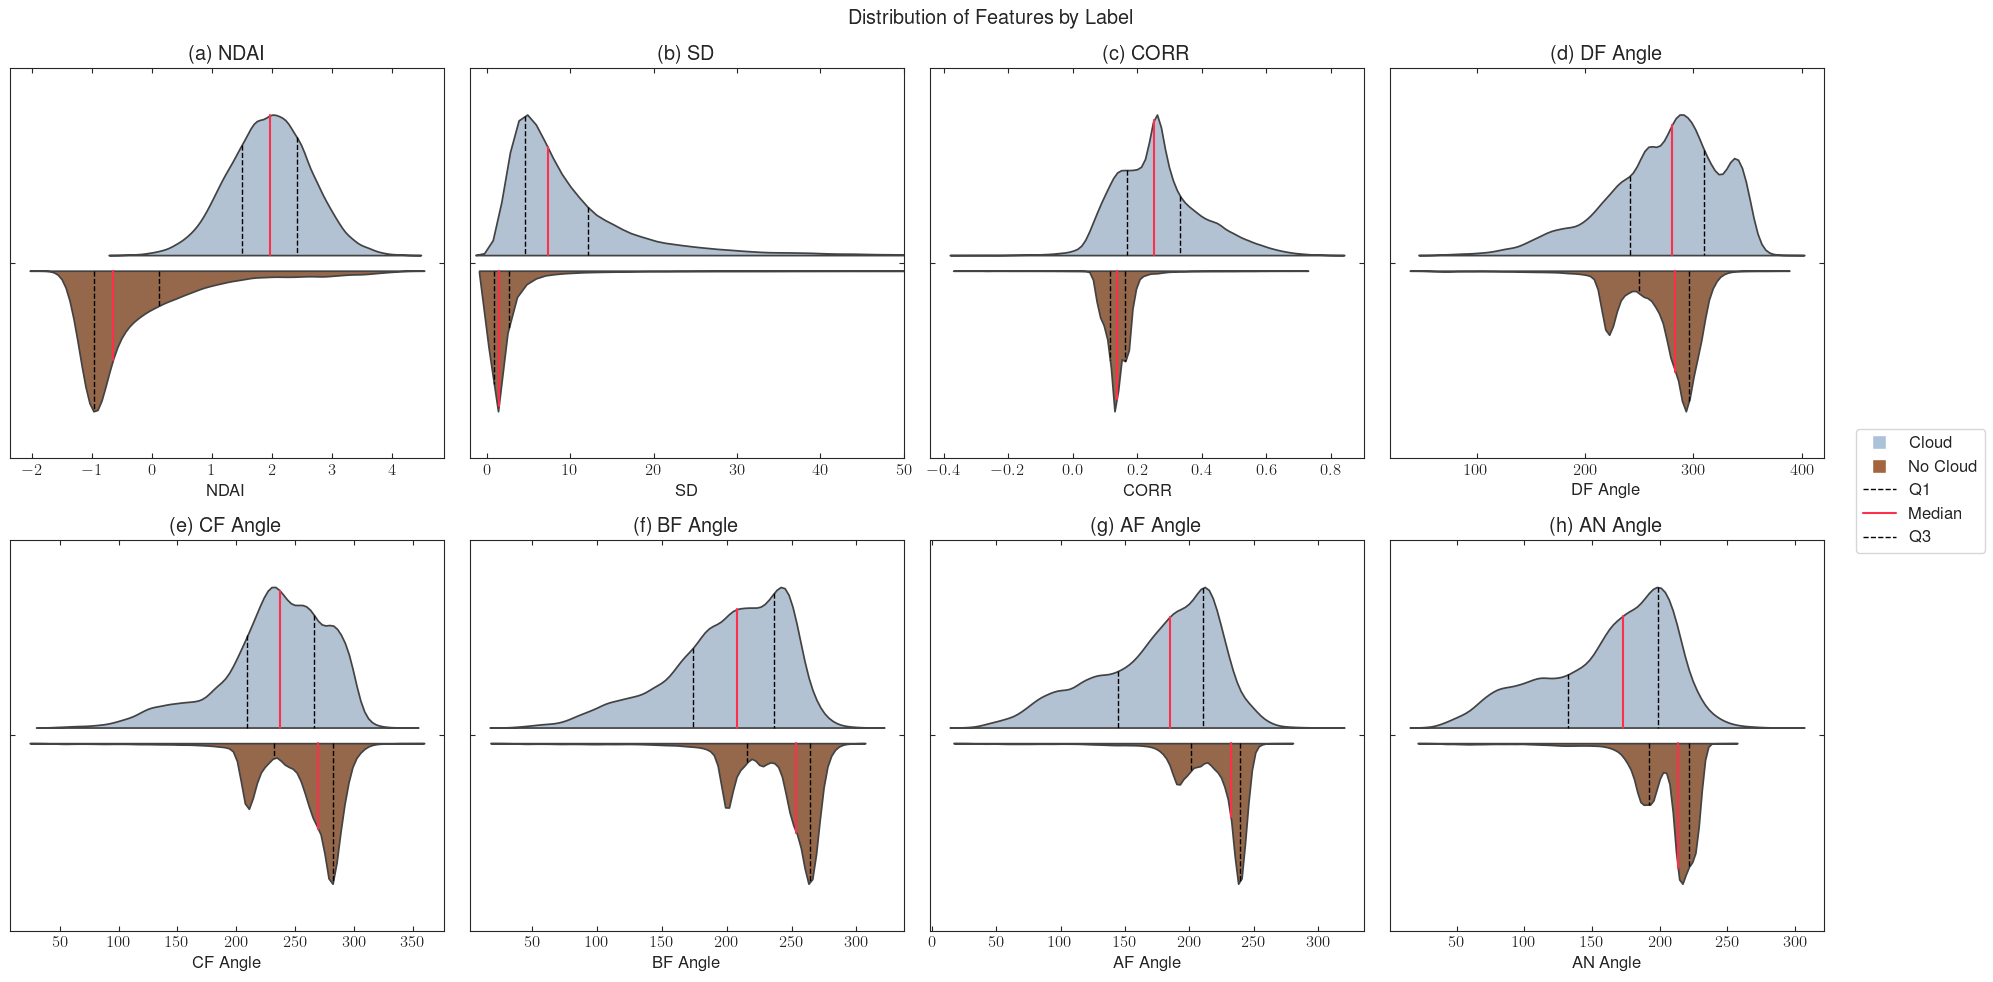

In [171]:
# Plot violin plot of each feature by label

fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Remove rows with label "Unlabeled"
all_imgs_df = all_imgs_df[all_imgs_df["label"] != "Unlabeled"]
all_imgs_df["label"] = pd.Categorical(all_imgs_df["label"], categories=["Cloud", "No Cloud"])

# Plot each feature
for i, feature in enumerate(columns[3:]):
    # Plot violin plot
    sns.violinplot(data=all_imgs_df, x=feature, ax=axs[i//4, i%4], palette=color_map, inner="quartile", split=True, hue="label", gap=.1)
    axs[i//4, i%4].set_title(f"({chr(97+i)}) {feature}")
    # Cut tails for distributions with very long tails
    if feature == "SD":
        axs[i//4, i%4].set_xlim(-2, 50)
    # Remove legend
    axs[i//4, i%4].get_legend().remove()
    # Customize Quartile lines
    for line_idx, line in enumerate(axs[i//4, i%4].lines):
        # Median lines
        if line_idx in [1, 4]:
            line.set_linewidth(1.5)
            line.set_linestyle("-")
            line.set_color("xkcd:lightish red") 
        # Q1 and Q3 lines
        else:
            line.set_linewidth(1)
            line.set_linestyle("--")
            line.set_color("black")
            
    
# Add global legend
label_handles = [plt.Line2D(
    [0], 
    [0], 
    marker="s", 
    color="w", 
    markerfacecolor=color_map[label], 
    markersize=10, 
    label=label) 
    for label in all_imgs_df["label"].cat.categories]

quartile_handles = [
    plt.Line2D([0], [0], color="black", linestyle="--", linewidth=1, label="Q1"),
    plt.Line2D([0], [0], color="xkcd:lightish red", linestyle="-", linewidth=1.5, label="Median"),
    plt.Line2D([0], [0], color="black", linestyle="--", linewidth=1, label="Q3")
]
fig.legend(handles=label_handles + quartile_handles, loc="center right")
# Add global title
plt.suptitle("Distribution of Features by Label")
plt.tight_layout(rect=[0, 0, 0.925, 1])
plt.show()
